In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('titanic_data.csv')
data['Family'] = data.SibSp + data.Parch
data.drop(columns=['PassengerId','Name','Cabin','Ticket', 'SibSp','Parch'], inplace=True) # Not interesting for plotting
data = data[data.notnull().all(axis=1)] # Drop rows will null values

# Use larger dataset to have more options for plots.

### Scatterplot and Lineplot
Numeric vs Numeric
Latent variables can be applied in hue, style, and size. Can also separate by row and column with relplot (specify kind={'scatter','line'})
For lineplot, 95% confidence intervals are created for repeat x-values.

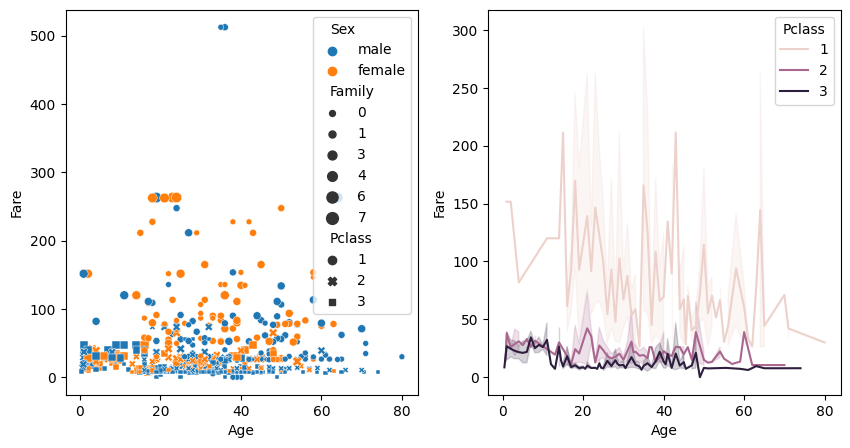

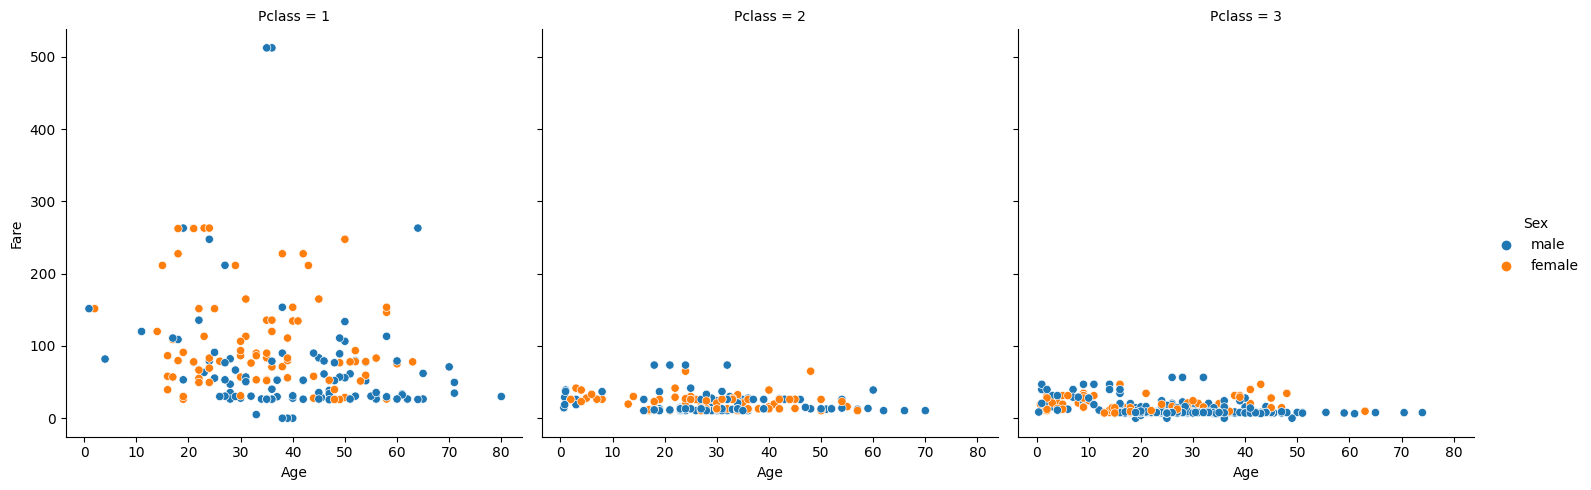

In [101]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Sex', style='Pclass', size='Family', ax=ax[0])
sns.lineplot(data=data, x='Age', y='Fare', hue='Pclass', ax=ax[1])

sns.relplot(data=data, x='Age', y='Fare', hue='Sex', col='Pclass', kind='scatter')

### Regplot
Adding a regression fit to the scatter plot. If you want multiple regression fits (hue or rows/cols), use lmplot.


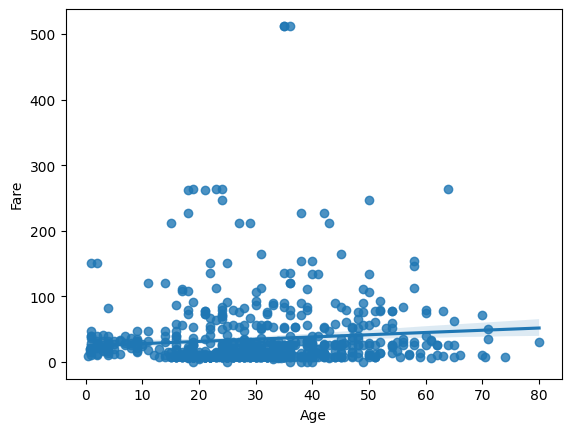

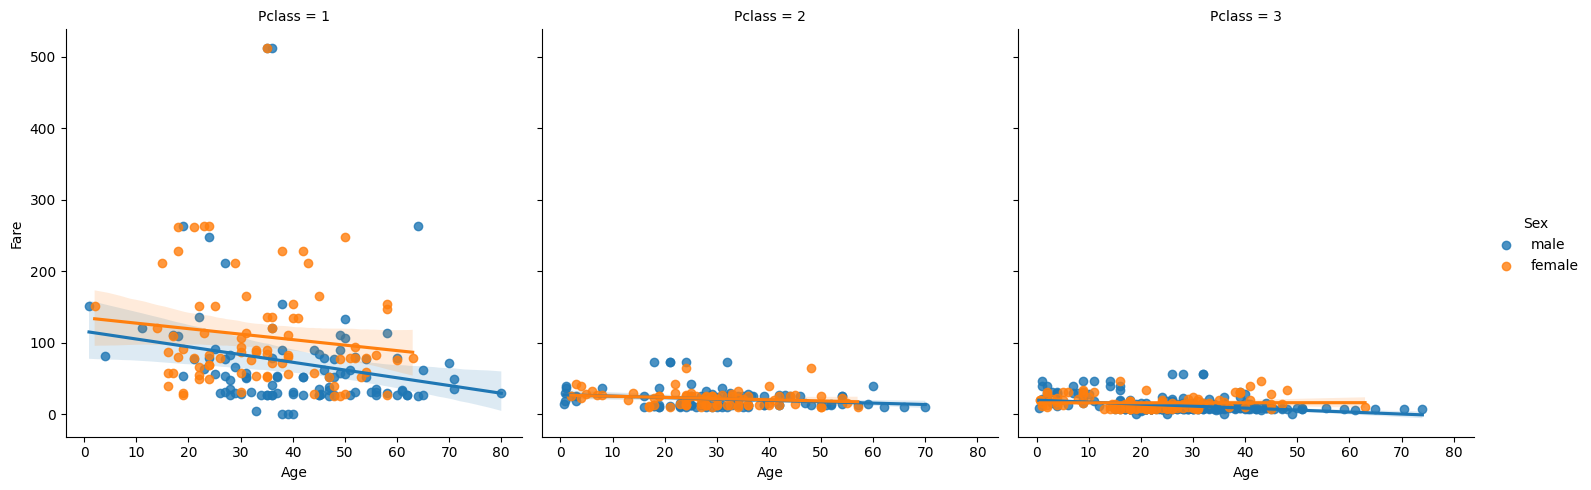

In [102]:
sns.regplot(data=data, x='Age', y='Fare')
sns.lmplot(data=data, x='Age', y='Fare', hue='Sex', col='Pclass')

### Histplot and kdeplot
Group by numeric or category. Returns a heatmap if y parameter is specified. Otherwise, y is computed from the stat parameter.
Kdeplot gives the smoothed distribution.
Latent variables can be applied in hue. Use multiple={'stack', 'dodge'} to avoid overlapping the results. For kde, multiple='fill' can also be used.

<AxesSubplot: xlabel='Age', ylabel='Density'>

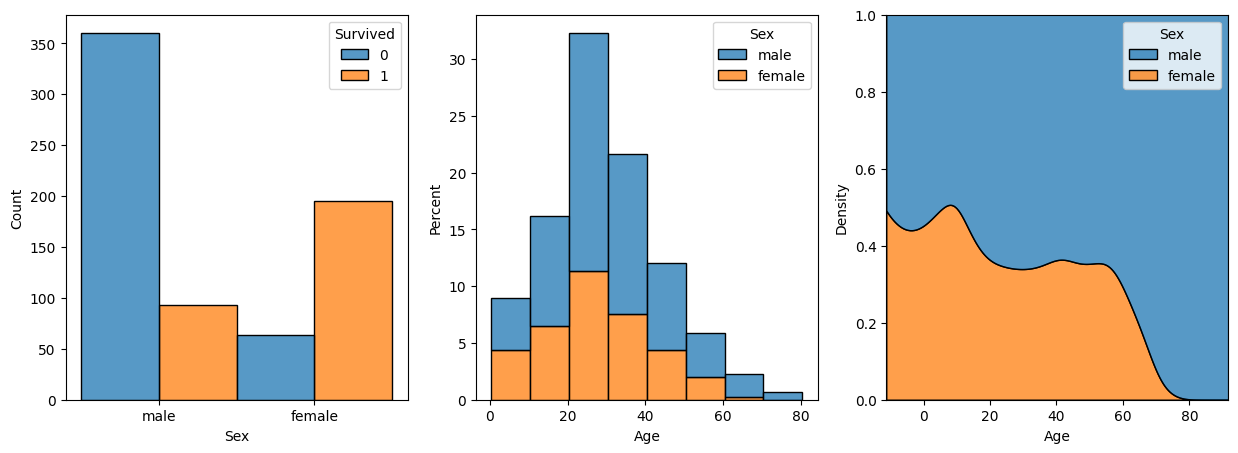

In [103]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.histplot(data=data, x='Sex', hue='Survived', multiple='dodge', stat='count', ax=ax[0])
sns.histplot(data=data, x='Age', binwidth=10, ax=ax[1], stat='percent', hue='Sex', multiple='stack')
sns.kdeplot(data=data, x='Age', hue='Sex', multiple='fill', ax=ax[2])

### Stripplot, swarmplot, boxplot, 
Category vs Numeric.
Latent variables can be applied in hue. Can also separate by row and column with relplot (specify kind={'strip','swarm','box','violin','boxen','point','bar','count'})

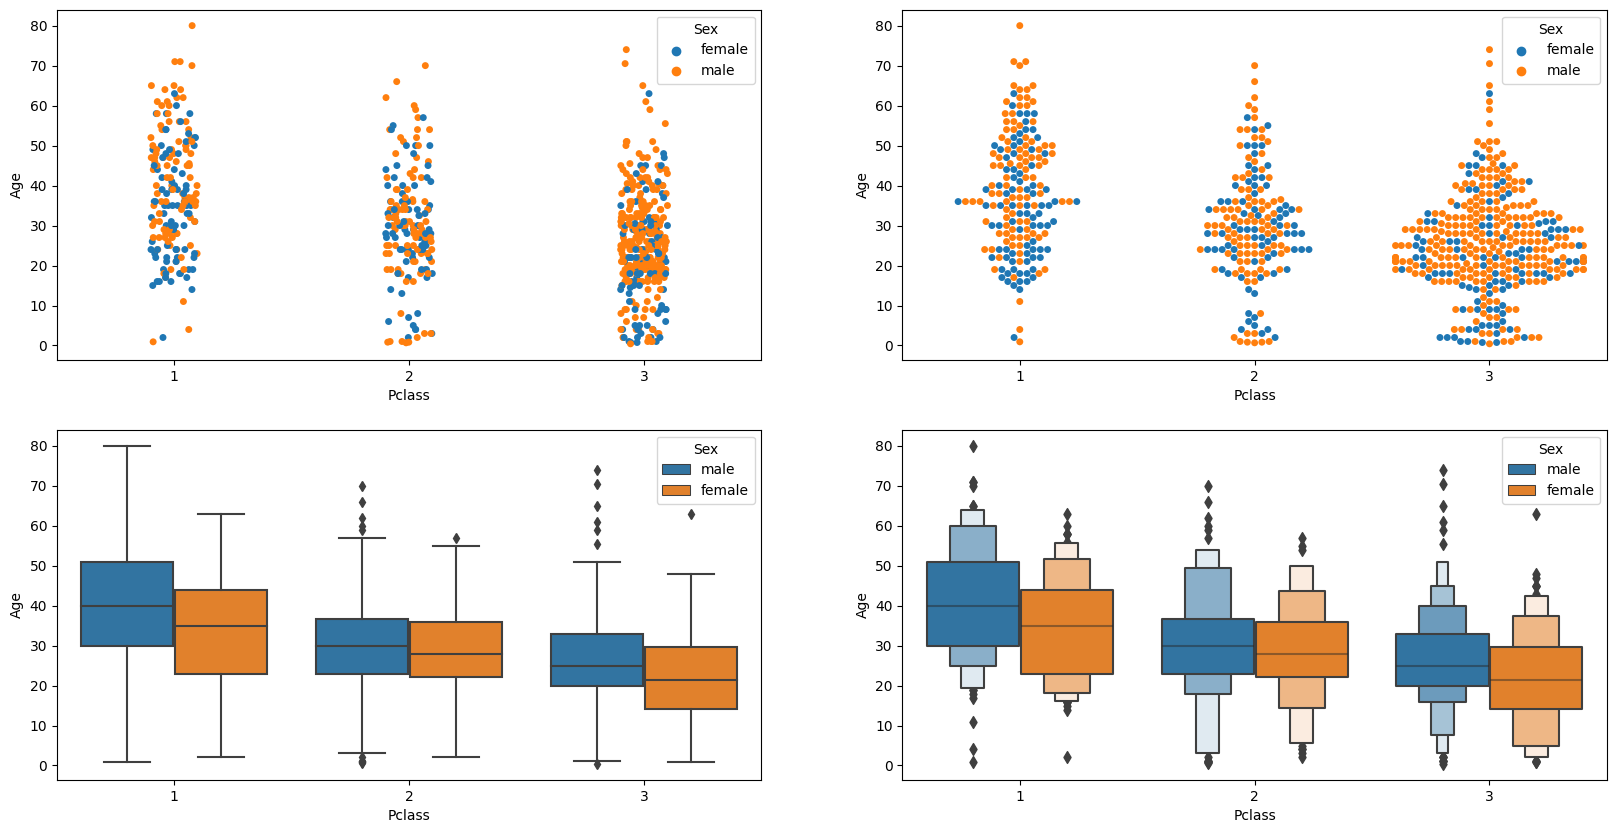

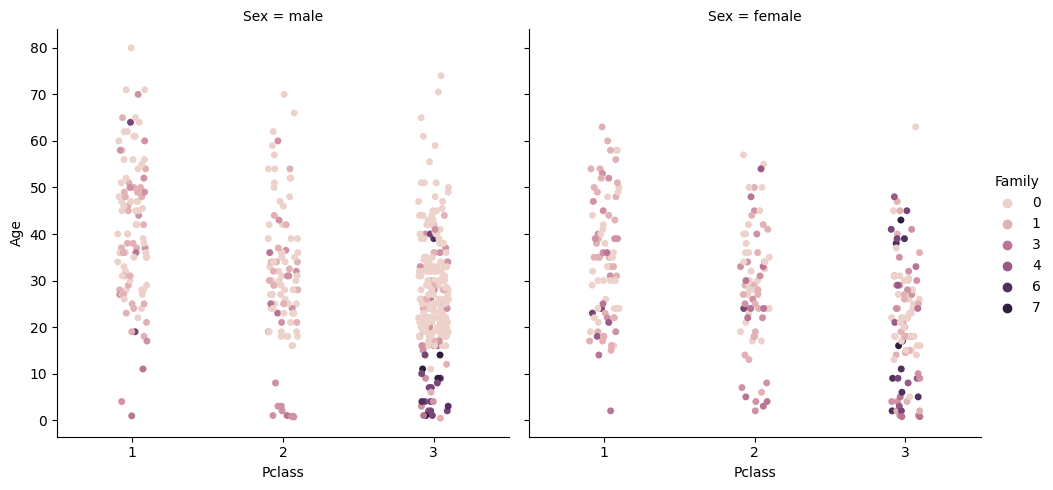

In [104]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
sns.stripplot(data=data, x='Pclass', y='Age', hue='Sex', ax=ax[0,0]) #Jitter added automatically. Set dodge=True to offset hues.
sns.swarmplot(data=data, x='Pclass', y='Age', hue='Sex', ax=ax[0,1]) #Same as swarmplot except points do not overlap. Easier to see distribution. 
sns.boxplot(data=data, x='Pclass', y='Age', hue='Sex', ax=ax[1,0])
sns.boxenplot(data=data, x='Pclass', y='Age', hue='Sex', ax=ax[1,1])

sns.catplot(data=data, x='Pclass', y='Age', hue='Family', col='Sex')